# Задание 1

Реализуйте стохастический градиентный спуск для решения линейной регрессии. Исследуйте сходимость с разным размером батча (1 - SGD, 2, $\ldots$, $n - 1$ - Minibatch GD, $n$ - GD из предыдущей работы).

In [4]:
import sys
sys.path.append('../../')

from helper import *

In [5]:
class get_model_LinearRegression:
    def __init__(self, batch_size=None):
        self.coef_ = []
        self.intercept_ = None
        self.batch_size = batch_size

    def fit(self, X_train, y_train, epsilon=24, learning_rate=0.01, max_epochs=100, batch_size=1, apply_min=True):
        X = X_train 
        y = y_train

        if self.batch_size is not None:
            batch_size = self.batch_size

        def mse_loss(w):
            y_pred = np.dot(X, w)
            mse = np.mean((y_pred - y)**2)
            return mse

        x0 = np.zeros(X.shape[1], dtype=float)

        point, _, _ = stochastic_gradient_descent(mse_loss, x0, epsilon=epsilon, learning_rate=learning_rate, max_epochs=max_epochs, batch_size=batch_size, apply_min=apply_min)

        self.coef_ = point[:-1]
        self.intercept_ = point[-1] 

    def predict(self, X_test):
        y_pred = []

        for i in range(len(X_test)):
            y = self.intercept_ + sum([self.coef_[j] * float(X_test[i][j]) for j in range(len(self.coef_))])
            y_pred.append(y)
        return y_pred

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from tqdm import tqdm

def get_reference_result(dataset):
    model = LinearRegression()
    return train_test_print_model(model, dataset, print_result=False, print_info=False, view_graphics=False)

def get_idea_result():
    return 0.0, 1.0

def research_LinearRegression_calculation(model_linear_regression):
    dataset = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
    mse_reference, r2_reference = get_reference_result(dataset)
    mse_ideal, r2_ideal = get_idea_result()

    print(f"{'mse_reference:':<15}{mse_reference:<14.6g} {' r2_reference:':<15}{r2_reference:<14.6g}")
    print(f"{'mse_ideal:':<15}{mse_ideal:<14.6g} {' r2_ideal:':<15}{r2_ideal:<14.6g}")

    mse_results = []
    r2_results = []
    k = 4

    for i in range(1, dataset.data.values.shape[1] + 1):
        model = model_linear_regression(batch_size=i)
        mse = mse_reference/k
        r2 = r2_reference/k
        tries = 0
        pbar = tqdm(desc=f"Batch size: {i}", unit=" test")
        while mse <= mse_reference/k or r2 <= r2_reference/k:
            mse, r2 = train_test_print_model(model, dataset, print_result=False, view_graphics=False)
            tries += 1
            pbar.set_description(f"Batch size: {i}, Try: {tries}, MSE: {mse:.2f}, R^2: {r2:.2f}")
            pbar.update()
        pbar.close()

        mse_results.append(mse)
        r2_results.append(r2)
    
    return mse_results, r2_results, mse_reference, r2_reference, mse_ideal, r2_ideal

def research_LinearRegression_view(mse_results, r2_results, mse_reference, r2_reference, mse_ideal, r2_ideal):
    # Строим графики
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # График MSE
    axs[0].plot(range(1, len(mse_results)+1), mse_results, marker='o')
    axs[0].set_xlabel('Batch size')
    axs[0].set_ylabel('MSE')
    axs[0].axhline(y=mse_reference, color='y', linestyle='--', label='MSE reference')
    axs[0].axhline(y=mse_ideal, color='g', linestyle='--', label='MSE ideal')
    axs[0].legend()

    # График R^2
    axs[1].plot(range(1, len(r2_results)+1), r2_results, marker='o')
    axs[1].set_xlabel('Batch size')
    axs[1].set_ylabel('R^2')
    axs[1].axhline(y=r2_reference, color='y', linestyle='--', label='R^2 reference')
    axs[1].axhline(y=r2_ideal, color='g', linestyle='--', label='R^2 ideal')
    axs[1].legend()

    plt.show()

def research_LinearRegression(model_linear_regression):
    mse_results, r2_results, mse_reference, r2_reference, mse_ideal, r2_ideal = research_LinearRegression_calculation(model_linear_regression)
    research_LinearRegression_view(mse_results, r2_results, mse_reference, r2_reference, mse_ideal, r2_ideal)

mse_reference: 24.2911         r2_reference: 0.668759      
mse_ideal:     0               r2_ideal:     1             


Batch size: 1, Try: 1, MSE: 44.74, R^2: 0.39: : 1 test [00:00, 41.67 test/s]
Batch size: 2, Try: 1, MSE: 36.05, R^2: 0.51: : 1 test [00:00, 28.36 test/s]
Batch size: 3, Try: 1, MSE: 38.92, R^2: 0.47: : 1 test [00:00, 22.22 test/s]
Batch size: 4, Try: 1, MSE: 45.23, R^2: 0.38: : 1 test [00:00, 16.88 test/s]
Batch size: 5, Try: 9, MSE: 39.46, R^2: 0.46: : 9 test [00:00, 16.09 test/s]  
Batch size: 6, Try: 11, MSE: 47.80, R^2: 0.35: : 11 test [00:00, 13.78 test/s]  
Batch size: 7, Try: 5, MSE: 46.33, R^2: 0.37: : 5 test [00:00, 11.37 test/s]  
Batch size: 8, Try: 11, MSE: 44.84, R^2: 0.39: : 11 test [00:01, 10.72 test/s]  
Batch size: 9, Try: 10, MSE: 46.49, R^2: 0.37: : 10 test [00:01,  9.61 test/s]
Batch size: 10, Try: 7, MSE: 46.78, R^2: 0.36: : 7 test [00:00,  8.71 test/s]  
Batch size: 11, Try: 11, MSE: 45.38, R^2: 0.38: : 11 test [00:01,  8.12 test/s]  
Batch size: 12, Try: 575, MSE: 46.10, R^2: 0.37: : 575 test [01:12,  7.94 test/s]    
Batch size: 13, Try: 2, MSE: 48.17, R^2: 0.34

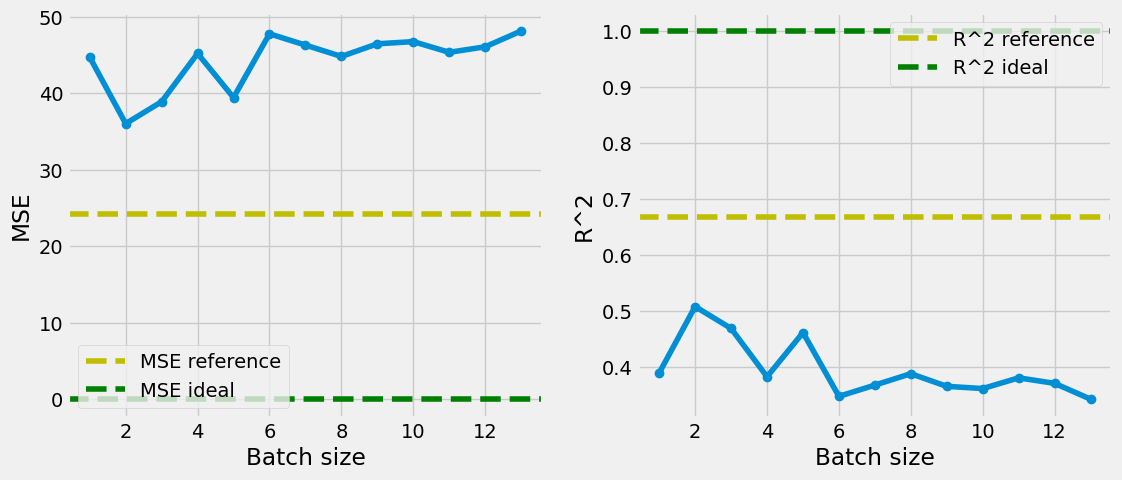

In [12]:
research_LinearRegression(get_model_LinearRegression)